# Searching, Sorting, and Timing

## Agenda
May 31, 2017 
c:
1. Timing
2. Prelude: Timing list indexing
3. Linear search
4. Binary search
5. Insertion sort

## 1. Timing

In [1]:
import time
time.time()
# number since 1970

1496254054.4123452

In [5]:
#invoke time without typing time
from time import time, sleep
start = time()
sleep(1) # pause execution for 1 second
end = time()
end-start
# not exactly 1 second because of overhead, functions called

1.0054380893707275

In [6]:
start = time()
exps = [2**n for n in range(1000)]
end = time()
end-start, exps

(0.0014028549194335938,
 [1,
  2,
  4,
  8,
  16,
  32,
  64,
  128,
  256,
  512,
  1024,
  2048,
  4096,
  8192,
  16384,
  32768,
  65536,
  131072,
  262144,
  524288,
  1048576,
  2097152,
  4194304,
  8388608,
  16777216,
  33554432,
  67108864,
  134217728,
  268435456,
  536870912,
  1073741824,
  2147483648,
  4294967296,
  8589934592,
  17179869184,
  34359738368,
  68719476736,
  137438953472,
  274877906944,
  549755813888,
  1099511627776,
  2199023255552,
  4398046511104,
  8796093022208,
  17592186044416,
  35184372088832,
  70368744177664,
  140737488355328,
  281474976710656,
  562949953421312,
  1125899906842624,
  2251799813685248,
  4503599627370496,
  9007199254740992,
  18014398509481984,
  36028797018963968,
  72057594037927936,
  144115188075855872,
  288230376151711744,
  576460752303423488,
  1152921504606846976,
  2305843009213693952,
  4611686018427387904,
  9223372036854775808,
  18446744073709551616,
  36893488147419103232,
  73786976294838206464,
  147573

In [8]:
def timeit(fn, setup = ..., times=1000):
    total_time = 0
    for _ in range(times):
        start = time()
        fn()
        end = time()
        total_time += end-start
    return total_time/times

In [9]:
timeit(lambda: sleep(1))

KeyboardInterrupt: 

In [12]:
import timeit
timeit.timeit('sleep(0.1);', globals=globals(), number=100)

10.43883803100016

In [15]:
def foo():
    for _ in range(10):
        sleep(0.001)

In [16]:
timeit.timeit('foo()', globals=globals(), number=100)

1.3316978200000449

In [ ]:
?%timeit - n10 sleep(0.1)

## 2. Prelude: Timing list indexing

In [2]:
import timeit
timeit.timeit(stmt='lst[0]',
              setup='lst=[0] * 10**6')

0.05702870000095572

In [22]:
timeit.timeit(stmt='lst[10**6-1]',
              setup='lst=[0] * 10**6')

0.04957082300006732

In [3]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(size):
        times[i] += timeit.timeit(stmt='lst[{}]'.format(i),
                                  globals=globals(),
                                  number=10)

In [33]:
'whatever {} what {} ever'.format(2,3)
# string interpolation

'whatever 2 what 3 ever'

In [6]:
times

[0.00011734999861801043,
 0.00010710501192079391,
 0.00010493000263522845,
 0.00010478000513103325,
 0.00010419400314276572,
 0.00010527800804993603,
 0.00010586798998701852,
 0.00010447398926771712,
 0.00010265698438161053,
 0.00010464799743203912,
 0.00010556201959843747,
 0.00010421400656923652,
 0.00010497299263079185,
 0.0001051520011969842,
 0.00010396000470791478,
 0.00010477699834154919,
 0.00010807500075316057,
 0.00010641500557539985,
 0.00010613599079078995,
 0.0001054720014508348,
 0.00010395100434834603,
 0.0001036080029734876,
 0.000105006001831498,
 0.00010461000056238845,
 0.0001029860031849239,
 0.00010299701898475178,
 0.00010193000707658939,
 0.00010116900739376433,
 0.0001009050047287019,
 0.00010148700130230282,
 0.00010178800584981218,
 0.0001035859950206941,
 0.00010521199874347076,
 0.00010404200656921603,
 0.00010213399582426064,
 0.00010383099106547888,
 0.00010159900193684734,
 0.0001014520075841574,
 0.00010154400661122054,
 0.00010178699812968262,
 0.000103

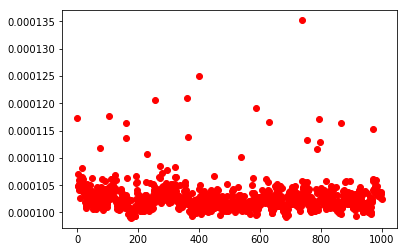

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()
# show how accessing an element in an list is the same time aka constant time for every element

Accessing an element in a list by index always takes the same amount of time, regardless of position. I.e., indexing incurs a *constant time* delay.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

(width of the array * height of the array) + base of the array = address of the element in the array

In [40]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(1,size):
        times[i] += timeit.timeit(stmt='lst.insert(0, None)', # lst[-1]
                                  setup = 'lst = [0]*{}'.format(i),
                                  globals=globals(),
                                  number=10)

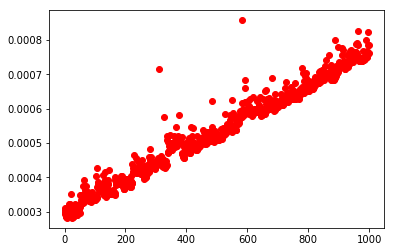

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()
'''Inserting (in the middle) takes a linear time 
because you have to shift all the elements up one in the array
even though lists are different sizes.

It takes the same amount of time to access the last element or any element. 
In other words, finding an element is constant time.

Changing the base is a problem because you have to 
update the base of any program that uses that array.

Inserting an element higher in the list will be faster 
because you have to shift less elements.

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [10]:
def index(lst, x):
    for i in range(len(lst)):
        if lst[i] == x:
            return i
        else:
            pass
    else:
        return None
'''If the loop ends by a return or break early, then it found something.
If it ends without doing this, then it did not find it and so we do the else statement.
'''

In [54]:
lst = list(range(100))
index(lst, 10)

10

In [55]:
index(lst, 99)

99

In [56]:
index(lst, -1)

In [57]:
def index(lst, x):
    for i in range(len(lst)):
        if lst[i] == x:
            return i
    else:
        raise ValueError(x)

In [58]:
index(lst, 10)

10

In [59]:
index(lst, -1)

ValueError: -1

In [60]:
try:
    print('Value found at', index(lst, -1))
except ValueError as e:
    print('Value not found:', e)

Value not found: -1


In [11]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=100))

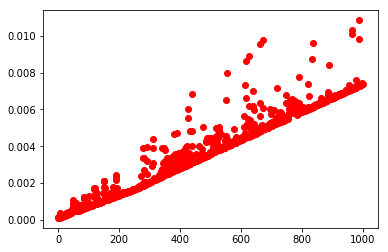

In [12]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()
# shows that finding an element in a list by linear search is linear

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

In [74]:
def index(lst, x):
    # assume that lst is sorted!!!
    # implementation
    # like find a character in a book
    lo = 0 
    hi = len(lst)-1
    while lo <= hi:
        mid = (hi + lo) // 2
        if x == lst[mid]:
            return mid
        elif x < lst[mid]:
            hi = mid - 1    
        else: # x > lst[mid]
            lo = mid + 1
    else:
        return None
        # raise ValueError(x)

In [75]:
lst = list(range(1000))
index(lst, 10)

10

In [76]:
index(lst, 999)

999

In [77]:
index(lst, -1)

In [78]:
for i in range(len(lst)):
    assert(i == index(lst, i))

In [79]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=1000))

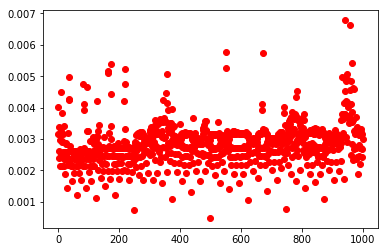

In [80]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()
''' Showing that finding a item in a list with binary search 
    the ends are the longest because you have to keep divinding
    the middle dot is 499 which is the fastest because it is the middle.
    The list is the same size in the search.
'''

In [81]:
import timeit
import random
times = []
for size in range(100, 10000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, -1)'.format(random.randrange(size)),
                               globals=globals(),
                               number=10000))

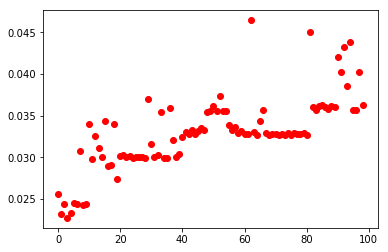

In [82]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()
''' logarithmic function aka binary search
    Finding a element that does not exist in an increasing list size.
'''

In [83]:
import timeit
import random
times = []
for e in range(5, 20):
    lst = list(range(2**e))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=100000))

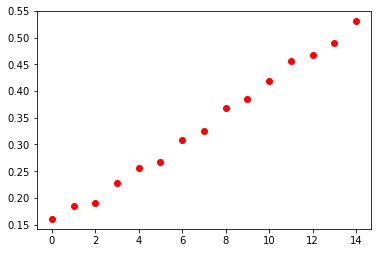

In [84]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()
# doubling the input only requires 1 more search

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

In [85]:
import random
lst = list(range(1000))
random.shuffle(lst)

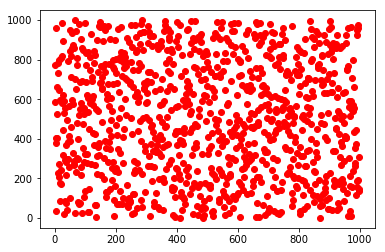

In [86]:
plt.plot(lst, 'ro')
plt.show()

In [88]:
def insertion_sort(lst):
    for i in range(1,len(lst)):
        for j in range(i,0,-1):
            if lst[j] < lst[j-1]:
                # swap elements at j and j-1
                lst[j], lst[j-1] = lst[j-1], lst[j]
            else:
                break

In [89]:
insertion_sort(lst)

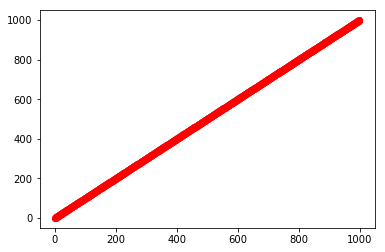

In [90]:
plt.plot(lst, 'ro')
plt.show()

In [91]:
import timeit
import random
times = []
for size in range(100, 5000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='random.shuffle(lst)',
                               globals=globals(),
                               number=1))

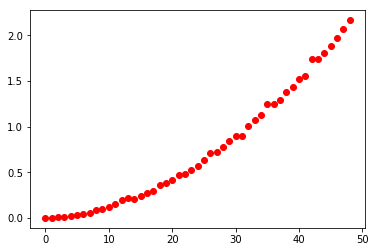

In [92]:
plt.plot(times, 'ro')
plt.show()